# Munich Venues and Airbnb prices

## Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!pip install geocoder
import geocoder as geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Get airbnb data

In [2]:
path='http://data.insideairbnb.com/germany/bv/munich/2020-05-24/visualisations/listings.csv'
df = pd.read_csv(path)
df.head()

id                                             name  host_id host_name  \
0   36720              Beautiful 2 rooms flat, Glockenbach   158413  Gabriela   
1   49309  Sublet - Apartment with Balcony in Downtown (1)   224802    Damien   
2   97945                 Deluxw-Apartm. with roof terrace   517685  Angelika   
3  114695               Apartment Munich/East with sundeck   581737   Stephan   
4  127383                City apartment next to Pinakothek   630556     Sonja   

   neighbourhood_group                 neighbourhood  latitude  longitude  \
0                  NaN  Ludwigsvorstadt-Isarvorstadt  48.13057   11.56929   
1                  NaN  Ludwigsvorstadt-Isarvorstadt  48.12456   11.55567   
2                  NaN                        Hadern  48.11476   11.48782   
3                  NaN                  Berg am Laim  48.11923   11.63726   
4                  NaN                   Maxvorstadt  48.15198   11.56486   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     95               2                 25  2017-07-22   
1     Private room     40              14                 40  2017-10-15   
2  Entire home/apt     80               2                131  2019-10-03   
3  Entire home/apt     95               2                 53  2019-10-06   
4  Entire home/apt    120               2                 84  2020-03-01   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.34                               1                 0  
1               0.34                               1               330  
2               1.24                               2                59  
3               0.49                               2               117  
4               0.77                               2                 0

## Get Munich Airbnb data

In [3]:
df.drop(columns=['name','host_id','host_name','neighbourhood_group','minimum_nights','number_of_reviews','last_review','reviews_per_month',\
                 'calculated_host_listings_count','availability_365'],inplace=True)
df.head()

id                 neighbourhood  latitude  longitude        room_type  \
0   36720  Ludwigsvorstadt-Isarvorstadt  48.13057   11.56929  Entire home/apt   
1   49309  Ludwigsvorstadt-Isarvorstadt  48.12456   11.55567     Private room   
2   97945                        Hadern  48.11476   11.48782  Entire home/apt   
3  114695                  Berg am Laim  48.11923   11.63726  Entire home/apt   
4  127383                   Maxvorstadt  48.15198   11.56486  Entire home/apt   

   price  
0     95  
1     40  
2     80  
3     95  
4    120

In [4]:
df.shape

(11128, 6)

In [5]:
df2 = df[df['price'] < 1001]
df2.shape

(11108, 6)

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Boxplot of prices

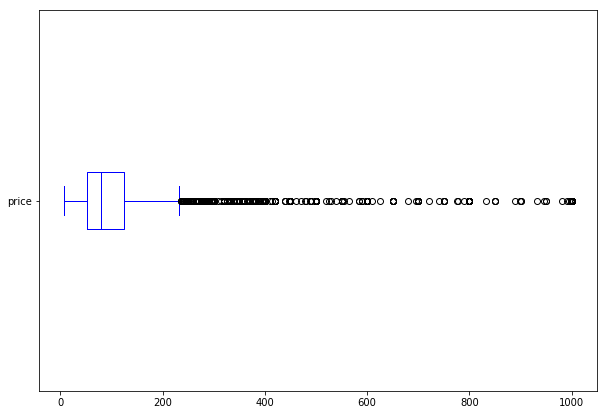

In [7]:
df2['price'].plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.show()

In [8]:
ave_df2 = df2.groupby('neighbourhood', axis=0).mean()

Average prices in neighborhood

In [9]:
ave_df2

id   latitude  \
neighbourhood                                                                 
Allach-Untermenzing                                 2.485720e+07  48.185855   
Altstadt-Lehel                                      2.456336e+07  48.137648   
Au-Haidhausen                                       2.186245e+07  48.128345   
Aubing-Lochhausen-Langwied                          2.542403e+07  48.156345   
Berg am Laim                                        2.196426e+07  48.126613   
Bogenhausen                                         2.321498e+07  48.151770   
Feldmoching-Hasenbergl                              2.405110e+07  48.205644   
Hadern                                              2.547486e+07  48.117823   
Laim                                                2.238008e+07  48.137006   
Ludwigsvorstadt-Isarvorstadt                        2.271899e+07  48.129925   
Maxvorstadt                                         2.269014e+07  48.150448   
Milbertshofen-Am Hart                               2.415293e+07  48.186282   
Moosach                                             2.847124e+07  48.180258   
Neuhausen-Nymphenburg                               2.247708e+07  48.153873   
Obergiesing                                         2.296481e+07  48.111455   
Pasing-Obermenzing                                  2.427333e+07  48.150086   
Ramersdorf-Perlach                                  2.486991e+07  48.105595   
Schwabing-Freimann                                  2.346025e+07  48.171757   
Schwabing-West                                      2.332794e+07  48.163969   
Schwanthalerhöhe                                    2.221381e+07  48.136602   
Sendling                                            2.186637e+07  48.117640   
Sendling-Westpark                                   2.241257e+07  48.116751   
Thalkirchen-Obersendling-Forstenried-Fürstenrie...  2.307993e+07  48.092621   
Tudering-Riem                                       2.561613e+07  48.124694   
Untergiesing-Harlaching                             2.119057e+07  48.107136   

                                                    longitude       price  
neighbourhood                                                              
Allach-Untermenzing                                 11.465515  104.214286  
Altstadt-Lehel                                      11.581302  158.171875  
Au-Haidhausen                                       11.593697  114.542777  
Aubing-Lochhausen-Langwied                          11.420487   96.602273  
Berg am Laim                                        11.630081   96.606635  
Bogenhausen                                         11.625256   93.848723  
Feldmoching-Hasenbergl                              11.540910   97.292035  
Hadern                                              11.484957   83.829630  
Laim                                                11.508123   91.911458  
Ludwigsvorstadt-Isarvorstadt                        11.562916  141.768786  
Maxvorstadt                                         11.565523  116.842007  
Milbertshofen-Am Hart                               11.566901   87.632035  
Moosach                                             11.521115   88.582329  
Neuhausen-Nymphenburg                               11.533594  104.026247  
Obergiesing                                         11.586711  103.824934  
Pasing-Obermenzing                                  11.463243  100.737778  
Ramersdorf-Perlach                                  11.626658   82.430622  
Schwabing-Freimann                                  11.592170  102.291874  
Schwabing-West                                      11.570419  108.276570  
Schwanthalerhöhe                                    11.540022  131.410377  
Sendling                                            11.544175  114.029478  
Sendling-Westpark                                   11.525741  107.761780  
Thalkirchen-Obersendling-Forstenried-Fürstenrie...  11.518454   97.771712  
Tudering-Riem               

## Airbnb in Map

In [10]:
#creating Munich Map
address = 'Munich'

geolocator = Nominatim(user_agent="ldn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


In [11]:
map_munich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df2['latitude'], df2['longitude'], df2['neighbourhood']):
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

In [12]:
ave_df2.drop(columns=['id'],inplace=True)
ave_df2.reset_index(inplace = True)

In [13]:
ave_df2

neighbourhood   latitude  longitude  \
0                                 Allach-Untermenzing  48.185855  11.465515   
1                                      Altstadt-Lehel  48.137648  11.581302   
2                                       Au-Haidhausen  48.128345  11.593697   
3                          Aubing-Lochhausen-Langwied  48.156345  11.420487   
4                                        Berg am Laim  48.126613  11.630081   
5                                         Bogenhausen  48.151770  11.625256   
6                              Feldmoching-Hasenbergl  48.205644  11.540910   
7                                              Hadern  48.117823  11.484957   
8                                                Laim  48.137006  11.508123   
9                        Ludwigsvorstadt-Isarvorstadt  48.129925  11.562916   
10                                        Maxvorstadt  48.150448  11.565523   
11                              Milbertshofen-Am Hart  48.186282  11.566901   
12                                            Moosach  48.180258  11.521115   
13                              Neuhausen-Nymphenburg  48.153873  11.533594   
14                                        Obergiesing  48.111455  11.586711   
15                                 Pasing-Obermenzing  48.150086  11.463243   
16                                 Ramersdorf-Perlach  48.105595  11.626658   
17                                 Schwabing-Freimann  48.171757  11.592170   
18                                     Schwabing-West  48.163969  11.570419   
19                                   Schwanthalerhöhe  48.136602  11.540022   
20                                           Sendling  48.117640  11.544175   
21                                  Sendling-Westpark  48.116751  11.525741   
22  Thalkirchen-Obersendling-Forstenried-Fürstenri...  48.092621  11.518454   
23                                      Tudering-Riem  48.124694  11.682527   
24                            Untergiesing-Harlaching  48.107136  11.570519   

         price  
0   104.214286  
1   158.171875  
2   114.542777  
3    96.602273  
4    96.606635  
5    93.848723  
6    97.292035  
7    83.829630  
8    91.911458  
9   141.768786  
10  116.842007  
11   87.632035  
12   88.582329  
13  104.026247  
14  103.824934  
15  100.737778  
16   82.430622  
17  102.291874  
18  108.276570  
19  131.410377  
20  114.029478  
21  107.761780  
22   97.771712  
23  124.843333  
24   98.902941

In [14]:
map_munich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(ave_df2['latitude'], ave_df2['longitude'], ave_df2['neighbourhood']):
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

## Foursquare and Venues

In [15]:
CLIENT_ID = 'JDKQ13W24Z43KE4QJZGZO1XATV1KOBLQPOLQ2FW0XB3Y00NV' # your Foursquare ID
CLIENT_SECRET = 'U2P4E3XZXDHIOT0EPAMCMVHVWKS0Y5RKZYGIJY2PEDJ2PSVF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
munich_venues = getNearbyVenues(names=ave_df2['neighbourhood'],
                                   latitudes=ave_df2['latitude'],
                                   longitudes=ave_df2['longitude']
                                  )

Allach-Untermenzing
Altstadt-Lehel
Au-Haidhausen
Aubing-Lochhausen-Langwied
Berg am Laim
Bogenhausen
Feldmoching-Hasenbergl
Hadern
Laim
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Milbertshofen-Am Hart
Moosach
Neuhausen-Nymphenburg
Obergiesing
Pasing-Obermenzing
Ramersdorf-Perlach
Schwabing-Freimann
Schwabing-West
Schwanthalerhöhe
Sendling
Sendling-Westpark
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln
Tudering-Riem
Untergiesing-Harlaching


Get all venues of neighborhoods of Munich

In [18]:
print(munich_venues.shape)
munich_venues.head()

(715, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Allach-Untermenzing              48.185855               11.465515   
1  Allach-Untermenzing              48.185855               11.465515   
2  Allach-Untermenzing              48.185855               11.465515   
3  Allach-Untermenzing              48.185855               11.465515   
4  Allach-Untermenzing              48.185855               11.465515   

                      Venue  Venue Latitude  Venue Longitude  \
0           Trattoria Olive       48.189905        11.466970   
1                Würmtalhof       48.188834        11.460680   
2         Sportforum Allach       48.186011        11.468422   
3  Sport Bittl Lagerverkauf       48.186025        11.468463   
4     Netto Marken-Discount       48.184247        11.461317   

        Venue Category  
0    Trattoria/Osteria  
1    German Restaurant  
2                  Gym  
3  Sporting Goods Shop  
4          Supermarket

In [19]:
munich_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Allach-Untermenzing                                                    14   
Altstadt-Lehel                                                         77   
Au-Haidhausen                                                          46   
Aubing-Lochhausen-Langwied                                              6   
Berg am Laim                                                           17   
Bogenhausen                                                            24   
Feldmoching-Hasenbergl                                                  7   
Hadern                                                                 11   
Laim                                                                   23   
Ludwigsvorstadt-Isarvorstadt                                           41   
Maxvorstadt                                                            54   
Milbertshofen-Am Hart                                                  44   
Moosach                                                                11   
Neuhausen-Nymphenburg                                                  41   
Obergiesing                                                            10   
Pasing-Obermenzing                                                     55   
Ramersdorf-Perlach                                                      6   
Schwabing-Freimann                                                     32   
Schwabing-West                                                         56   
Schwanthalerhöhe                                                       54   
Sendling                                                               41   
Sendling-Westpark                                                      13   
Thalkirchen-Obersendling-Forstenried-Fürstenrie...                     18   
Tudering-Riem                                                           1   
Untergiesing-Harlaching                                                13   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Allach-Untermenzing                                                     14   
Altstadt-Lehel                                                          77   
Au-Haidhausen                                                           46   
Aubing-Lochhausen-Langwied                                               6   
Berg am Laim                                                            17   
Bogenhausen                                                             24   
Feldmoching-Hasenbergl                                                   7   
Hadern                                                                  11   
Laim                                                                    23   
Ludwigsvorstadt-Isarvorstadt                                            41   
Maxvorstadt                                                             54   
Milbertshofen-Am Hart                                                   44   
Moosach                                                                 11   
Neuhausen-Nymphenburg                                                   41   
Obergiesing                                                             10   
Pasing-Obermenzing                                                      55   
Ramersdorf-Perlach                                                       6   
Schwabing-Freimann                                                      32   
Schwabing-West                                                          56   
Schwanthalerhöhe                                                        54   
Sendling                                                                41   
Sendling-Westpark                                                       13   
Thalkirchen-Obersendling-Forstenried-Fürstenrie...                      18   
Tudering-Riem         

Analyze each neighborhood

In [20]:
# one hot encoding
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
munich_onehot['Neighborhood'] = munich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.head()

Neighborhood  Afghan Restaurant  American Restaurant  Arcade  \
0  Allach-Untermenzing                  0                    0       0   
1  Allach-Untermenzing                  0                    0       0   
2  Allach-Untermenzing                  0                    0       0   
3  Allach-Untermenzing                  0                    0       0   
4  Allach-Untermenzing                  0                    0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Austrian Restaurant  Auto Workshop  \
0                 0                   0                    0              0   
1                 0                   0                    0              0   
2                 0                   0                    0              0   
3                 0                   0                    0              0   
4                 0                   0                    0              0   

   Automotive Shop  Bagel Shop  Bakery  Bank  Bar  Bavarian Restaurant  \
0                0           0       0     0    0                    0   
1                0           0       0     0    0                    0   
2                0           0       0     0    0                    0   
3                0           0       0     0    0                    0   
4                0           0       0     0    0                    0   

   Beer Garden  Beer Store  Big Box Store  Bistro  Bookstore  \
0            0           0              0       0          0   
1            0           0              0       0          0   
2            0           0              0       0          0   
3            0           0              0       0          0   
4            0           0              0       0          0   

   Bosnian Restaurant  Boutique  Breakfast Spot  Brewery  Burger Joint  \
0                   0         0               0        0             0   
1                   0         0               0        0             0   
2                   0         0               0        0             0   
3                   0         0               0        0             0   
4                   0         0               0        0             0   

   Burrito Place  Bus Stop  Butcher  Café  Candy Store  Caucasian Restaurant  \
0              0         0        0     0            0                     0   
1              0         0        0     0            0                     0   
2              0         0        0     0            0                     0   
3              0         0        0     0            0                     0   
4              0         0        0     0            0                     0   

   Cemetery  Chinese Restaurant  Church  Clothing Store  Club House  \
0         0                   0       0               0           0   
1         0                   0       0               0           0   
2         0                   0       0               0           0   
3         0                   0       0               0           0   
4         0                   0       0               0           0   

   Cocktail Bar  Coffee Shop  Comedy Club  Concert Hall  Convenience Store  \
0             0            0            0             0                  0   
1             0            0            0             0                  0   
2             0            0            0             0                  0   
3             0            0            0             0                  0   
4             0            0            0             0           

In [21]:
munich_onehot.shape

(715, 168)

In [22]:
munich_grouped = munich_onehot.groupby('Neighborhood').mean().reset_index()
munich_grouped

Neighborhood  Afghan Restaurant  \
0                                 Allach-Untermenzing           0.000000   
1                                      Altstadt-Lehel           0.000000   
2                                       Au-Haidhausen           0.000000   
3                          Aubing-Lochhausen-Langwied           0.000000   
4                                        Berg am Laim           0.000000   
5                                         Bogenhausen           0.000000   
6                              Feldmoching-Hasenbergl           0.000000   
7                                              Hadern           0.000000   
8                                                Laim           0.000000   
9                        Ludwigsvorstadt-Isarvorstadt           0.000000   
10                                        Maxvorstadt           0.000000   
11                              Milbertshofen-Am Hart           0.000000   
12                                            Moosach           0.000000   
13                              Neuhausen-Nymphenburg           0.000000   
14                                        Obergiesing           0.000000   
15                                 Pasing-Obermenzing           0.000000   
16                                 Ramersdorf-Perlach           0.000000   
17                                 Schwabing-Freimann           0.000000   
18                                     Schwabing-West           0.017857   
19                                   Schwanthalerhöhe           0.000000   
20                                           Sendling           0.000000   
21                                  Sendling-Westpark           0.000000   
22  Thalkirchen-Obersendling-Forstenried-Fürstenri...           0.000000   
23                                      Tudering-Riem           0.000000   
24                            Untergiesing-Harlaching           0.000000   

    American Restaurant    Arcade  Argentinian Restaurant  Art Gallery  \
0               0.00000  0.000000                0.000000      0.00000   
1               0.00000  0.000000                0.012987      0.00000   
2               0.00000  0.000000                0.000000      0.00000   
3               0.00000  0.000000                0.000000      0.00000   
4               0.00000  0.000000                0.000000      0.00000   
5               0.00000  0.000000                0.000000      0.00000   
6               0.00000  0.000000                0.000000      0.00000   
7               0.00000  0.000000                0.000000      0.00000   
8               0.00000  0.000000                0.000000      0.00000   
9               0.02439  0.000000                0.000000      0.02439   
10              0.00000  0.018519                0.000000      0.00000   
11              0.00000  0.000000                0.000000      0.00000   
12              0.00000  0.000000                0.000000      0.00000   
13              0.00000  0.000000                0.000000      0.00000   
14              0.00000  0.000000                0.000000      0.00000   
15              0.00000  0.000000                0.000000      0.00000   
16              0.00000  0.000000                0.000000      0.00000   
17              0.00000  0.000000                0.000000      0.00000   
18              0.00000  0.000000                0.000000      0.00000   
19              0.00000  0.000000                0.000000      0.00000   
20              0.00000  0.000000                0.000000      0.00000   
21              0.00000  0.000000                0.000000      0.00000   
22              0.00000  0.000000                0.000000      0.00000   
23              0.00000  0.000000                0.000000      0.00000   
24              0.00000  0.000000                0.000000      0.00000   

    Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0     0.000000             0.000000          0.000000         

### Getting frequency of clusters

In [23]:
num_top_venues = 5

for hood in munich_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allach-Untermenzing----
                 venue  freq
0  Sporting Goods Shop  0.14
1    Trattoria/Osteria  0.07
2    German Restaurant  0.07
3        Shopping Mall  0.07
4                  Gym  0.07


----Altstadt-Lehel----
                 venue  freq
0  Bavarian Restaurant  0.08
1                 Café  0.08
2                Hotel  0.05
3          Coffee Shop  0.05
4                Plaza  0.05


----Au-Haidhausen----
                venue  freq
0  Italian Restaurant  0.09
1   French Restaurant  0.07
2                 Bar  0.07
3      Ice Cream Shop  0.04
4   Indian Restaurant  0.04


----Aubing-Lochhausen-Langwied----
               venue  freq
0           Bus Stop  0.33
1       Soccer Field  0.17
2  Indian Restaurant  0.17
3  German Restaurant  0.17
4             Bakery  0.17


----Berg am Laim----
              venue  freq
0       Supermarket  0.12
1  Asian Restaurant  0.12
2             Hotel  0.12
3         Drugstore  0.06
4      Tram Station  0.06


----Bogenhausen----
       

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Getting top venues of neighborhoods

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = munich_grouped['Neighborhood']

for ind in np.arange(munich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         Allach-Untermenzing   Sporting Goods Shop    Light Rail Station   
1              Altstadt-Lehel                  Café   Bavarian Restaurant   
2               Au-Haidhausen    Italian Restaurant                   Bar   
3  Aubing-Lochhausen-Langwied              Bus Stop     Indian Restaurant   
4                Berg am Laim                 Hotel           Supermarket   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Supermarket     German Restaurant              Bus Stop   
1                 Hotel           Coffee Shop                 Plaza   
2     French Restaurant          Cocktail Bar                Bakery   
3          Soccer Field                Bakery     German Restaurant   
4      Asian Restaurant               Dog Run              Bus Stop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0     Trattoria/Osteria                  Bank              Pharmacy   
1     German Restaurant             Bookstore              Boutique   
2       Thai Restaurant                  Café     Indian Restaurant   
3           Yoga Studio    English Restaurant  Fast Food Restaurant   
4             Drugstore         Big Box Store             Gastropub   

  9th Most Common Venue 10th Most Common Venue  
0                   Gym  Vietnamese Restaurant  
1    Seafood Restaurant             Steakhouse  
2                 Plaza      German Restaurant  
3        Farmers Market     Falafel Restaurant  
4                  Café           Tram Station

## K MEANS CLUSTERING

In [26]:
# set number of clusters
kclusters = 4

munich_grouped_clustering = munich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 0, 2, 1, 2, 2, 2, 1], dtype=int32)

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

munich_merged = ave_df2
munich_merged = munich_merged.rename(columns={'neighbourhood': 'Neighborhood'})

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
munich_merged = munich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

munich_merged.head() # check the last columns!

Neighborhood   latitude  longitude       price  \
0         Allach-Untermenzing  48.185855  11.465515  104.214286   
1              Altstadt-Lehel  48.137648  11.581302  158.171875   
2               Au-Haidhausen  48.128345  11.593697  114.542777   
3  Aubing-Lochhausen-Langwied  48.156345  11.420487   96.602273   
4                Berg am Laim  48.126613  11.630081   96.606635   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               0   Sporting Goods Shop    Light Rail Station   
1               1                  Café   Bavarian Restaurant   
2               1    Italian Restaurant                   Bar   
3               0              Bus Stop     Indian Restaurant   
4               2                 Hotel           Supermarket   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Supermarket     German Restaurant              Bus Stop   
1                 Hotel           Coffee Shop                 Plaza   
2     French Restaurant          Cocktail Bar                Bakery   
3          Soccer Field                Bakery     German Restaurant   
4      Asian Restaurant               Dog Run              Bus Stop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0     Trattoria/Osteria                  Bank              Pharmacy   
1     German Restaurant             Bookstore              Boutique   
2       Thai Restaurant                  Café     Indian Restaurant   
3           Yoga Studio    English Restaurant  Fast Food Restaurant   
4             Drugstore         Big Box Store             Gastropub   

  9th Most Common Venue 10th Most Common Venue  
0                   Gym  Vietnamese Restaurant  
1    Seafood Restaurant             Steakhouse  
2                 Plaza      German Restaurant  
3        Farmers Market     Falafel Restaurant  
4                  Café           Tram Station

## Creating map with clusters and understanding the data

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['latitude'], munich_merged['longitude'], munich_merged['Neighborhood'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Less areas of attraction

In [29]:
munich_merged.loc[munich_merged['Cluster Labels'] == 0, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

latitude 1st Most Common Venue 2nd Most Common Venue  \
0   48.185855   Sporting Goods Shop    Light Rail Station   
3   48.156345              Bus Stop     Indian Restaurant   
16  48.105595              Bus Stop                 Hotel   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Supermarket     German Restaurant              Bus Stop   
3           Soccer Field                Bakery     German Restaurant   
16           Supermarket                Market         Garden Center   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Trattoria/Osteria                  Bank              Pharmacy   
3            Yoga Studio    English Restaurant  Fast Food Restaurant   
16    English Restaurant  Fast Food Restaurant        Farmers Market   

   9th Most Common Venue 10th Most Common Venue  
0                    Gym  Vietnamese Restaurant  
3         Farmers Market     Falafel Restaurant  
16    Falafel Restaurant            Event Space

### City center area with cafes, bars and restaurants

In [30]:
munich_merged.loc[munich_merged['Cluster Labels'] == 1, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

latitude  1st Most Common Venue  2nd Most Common Venue  \
1   48.137648                   Café    Bavarian Restaurant   
2   48.128345     Italian Restaurant                    Bar   
5   48.151770   Gym / Fitness Center                   Café   
9   48.129925                   Café  Vietnamese Restaurant   
10  48.150448                   Café             Art Museum   
11  48.186282               Bus Stop                   Bank   
13  48.153873     Italian Restaurant                 Bakery   
14  48.111455                  Hotel     Italian Restaurant   
15  48.150086     Italian Restaurant                   Café   
17  48.171757                  Hotel             Restaurant   
18  48.163969  Vietnamese Restaurant     Italian Restaurant   
19  48.136602                   Café         Ice Cream Shop   
20  48.117640     Italian Restaurant      German Restaurant   
22  48.092621               Bus Stop                  Hotel   

   3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
1                  Hotel            Coffee Shop                 Plaza   
2      French Restaurant           Cocktail Bar                Bakery   
5           Cocktail Bar            Coffee Shop    Chinese Restaurant   
9     Italian Restaurant           Burger Joint                   Bar   
10            Steakhouse         History Museum     Indian Restaurant   
11      Doner Restaurant       Greek Restaurant                  Café   
13           Pizza Place       Sushi Restaurant        Ice Cream Shop   
14                  Park                   Café              Bus Stop   
15             Drugstore            Coffee Shop           Supermarket   
17                Bakery      German Restaurant           Supermarket   
18                   Bar    Japanese Restaurant       Thai Restaurant   
19           Pizza Place       Doner Restaurant                 Hotel   
20          Optical Shop  Vietnamese Restaurant    Athletics & Sports   
22            Restaurant      Trattoria/Osteria                  Café   

    6th Most Common Venue        7th Most Common Venue 8th Most Common Venue  \
1       German Restaurant                    Bookstore              Boutique   
2         Thai Restaurant                         Café     Indian Restaurant   
5             Supermarket                         Park             Drugstore   
9            Cocktail Bar             Asian Restaurant                 Plaza   
10      German Restaurant      Grilled Meat Restaurant           Event Space   
11            Supermarket  Eastern European Restaurant        Ice Cream Shop   
13      Indian Restaurant                   Restaurant                 Plaza   
14      German Restaurant             Greek Restaurant         Metro Station   
15         Ice Cream Shop         Fast Food Restaurant                 Plaza   
17              Drugstore                       Lounge         Metro Station   
18                  Hotel           Mexican Restaurant     Indian Restaurant   
19  Vietnamese Restaurant                 Burger Joint                   Bar   
20       Doner Restaurant                         Café                Market   
22              Wine Shop                    Hotel Bar  Gym / Fitness Center   

   9th Most Common Venue 10th Most Common Venue  
1     Seafood Restaurant             Steakhouse  
2                  Plaza      German Restaurant  
5          Movie Theater                   Bank  
9          Movie Theater             Restaurant  
10             Bookstore          Movie Theater  
11             Drugstore                 Bakery  
13                  Park         Sandwich Place  
14        Ice Cream Shop       Insurance Office  
15                Bakery         Clothing Store  
17        Farmers Market                    Spa  
18                  Café            Supermarket  
19    Italian Restaurant       Asian Restaurant  
20    Spanish Restaurant           Soccer Field  
22                   Gym       Doner Restaurant

### Local areas with mostly supermarkets

In [31]:
munich_merged.loc[munich_merged['Cluster Labels'] == 2, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

latitude 1st Most Common Venue 2nd Most Common Venue  \
4   48.126613                 Hotel           Supermarket   
6   48.205644           Supermarket            Club House   
7   48.117823           Supermarket     German Restaurant   
8   48.137006           Supermarket                  Bank   
12  48.180258                Bakery           Supermarket   
21  48.116751             Drugstore           Supermarket   
24  48.107136                Bakery                  Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
4       Asian Restaurant               Dog Run              Bus Stop   
6           Liquor Store    Italian Restaurant             Drugstore   
7       Asian Restaurant      Sushi Restaurant          Soccer Field   
8                 Bakery             Bookstore     German Restaurant   
12                 Plaza                   Gym    Light Rail Station   
21                Bakery           Post Office                 Hotel   
24                 Hotel              Pharmacy     Indian Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
4              Drugstore         Big Box Store             Gastropub   
6               Bus Stop           Yoga Studio    English Restaurant   
7               Bus Stop     Food & Drink Shop         Metro Station   
8               Bus Stop     Mobile Phone Shop            Laundromat   
12     Trattoria/Osteria          Tram Station         Metro Station   
21              Pharmacy        Ice Cream Shop                 Plaza   
24  Gym / Fitness Center                 Plaza           Supermarket   

   9th Most Common Venue 10th Most Common Venue  
4                   Café           Tram Station  
6   Fast Food Restaurant         Farmers Market  
7                Dog Run   Fast Food Restaurant  
8         Sandwich Place   Caucasian Restaurant  
12           Yoga Studio      Electronics Store  
21    Italian Restaurant             Shoe Store  
24          Tram Station       Greek Restaurant

### Special area of city with big fair halls

In [32]:
munich_merged.loc[munich_merged['Cluster Labels'] == 3, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

latitude 1st Most Common Venue 2nd Most Common Venue  \
23  48.124694         Auto Workshop           Yoga Studio   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
23                 Field  Fast Food Restaurant        Farmers Market   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
23    Falafel Restaurant           Event Space  Ethiopian Restaurant   

   9th Most Common Venue 10th Most Common Venue  
23    English Restaurant      Electronics Store

In [33]:
munich_merged.loc[munich_merged['Cluster Labels'] == 4, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

Empty DataFrame
Columns: [latitude, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

In [34]:
!wget --quiet http://data.insideairbnb.com/germany/bv/munich/2020-05-24/visualisations/neighbourhoods.geojson -O neighbourhoods.geojson
print('GeoJSON file downloaded!')
muc_geo = r'neighbourhoods.geojson' # geojson file

GeoJSON file downloaded!


In [35]:
muc_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

muc_map.choropleth(
    geo_data=muc_geo,
    data=munich_merged,
    columns=['Neighborhood','price'],
    key_on='feature.properties.neighbourhood',
    fill_color='RdPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Airbnb Prices'
)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['latitude'],munich_merged['longitude'], munich_merged['Neighborhood'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(muc_map)
       
# display map
muc_map

/opt/conda/envs/Python36/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [36]:
munich_grouped['price']=ave_df2['price']
v= munich_grouped.iloc[:, -1]
munich_grouped.iloc[:,-1] = (v - v.min()) / (v.max() - v.min())

In [37]:
kclusters = 6

munich_grouped_clustering = munich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 5, 3, 3, 3, 3, 3, 1], dtype=int32)

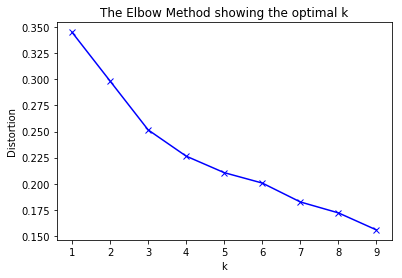

In [38]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(munich_grouped_clustering)
    kmeanModel.fit(munich_grouped_clustering)
    distortions.append(sum(np.min(cdist(munich_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / munich_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()